<a href="https://colab.research.google.com/github/aliyaaliyal/Tugas-Belajar-Python/blob/main/Aliya_0002_simple_regresi_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tahapan dalam penggunaan Simple Linear Regression adalah sebagai berikut:
1. Load library python
2. Load dataset
3. Sneak peak data
4. Handling missing values
5. Exploratory Data Analysis (EDA)
6. Modelling
7. Prediction
1Memuat beberapa library python yang akan digunakan dalam tutorial ini. Library tersebut
adalah:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



*   Module LinearRegression digunakan untuk memanggil algoritma Linear Regression. 
*   Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.

2. Memuat dataset yang akan digunakan menggunakan library pandas dengan function read_csv (karena file kita extensionya csv).
 


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aliyaaliyal/mesin-learning/main/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])

Melihat beberapa general information dari dataset kita agar kita lebih familiar dengan data yang
kita punya.
- Melihat 5 baris teratas dari data.
- Independent variabel(x) adalah horsepower.
- Dependent variabel(y) adalah price.
df.head()

In [3]:
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


5 Data Teratas
- Mengetahui jumlah kolom dan baris dari data.
- Data kita mempunya 2 kolom dengan 200 baris.df.shape

In [4]:
df.shape

(205, 2)

Jumlah baris dan kolom
- Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll. df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    int64  
 1   price       205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


**Informasi Data**
- Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.df.describe()

In [6]:
df.describe()

,horsepower,price
count,205.000000,205.000000
mean,104.117073,13276.710571
std,39.544167,7988.852332
min,48.000000,5118.000000
25%,70.000000,7788.000000
50%,95.000000,10295.000000
75%,116.000000,16503.000000
max,288.000000,45400.000000


**Statistical Description**
4 Krosscek dan Menangani missing values di data jika ada, jika tidak ada maka bisa dilanjutkan ke
tahap exploration data.
- Mencari dan menangani missing values.
- Ternyata data kita tidak ada missing values.df.isnull().sum()

In [7]:
df.isnull().sum()

horsepower    0
price         0
dtype: int64

Jumlah data yang missing

5. Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan
insights dari data.
- Univariate analysis horsepower.
- Melihat distribusi dari horsepower.

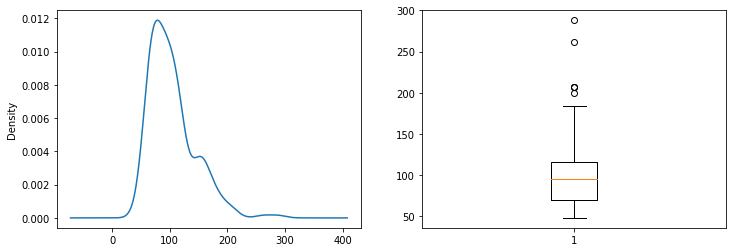

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

Plot distribusi dan boxplot horsepower

- Dapat dilihat bahwa mean dan median dari horsepower terpusat di sekitar nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data
kurang merata (memiliki standard deviasi yang tinggi) karena memiliki whiskers
boxplot yang panjang.
- Terdapat 3 outliers data yang bisa dilihat di boxplot.

* Univariate analysis price.
* Melihat distribusi dari price.

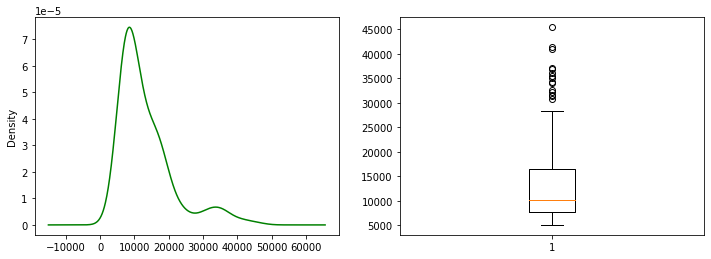

In [9]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

Plot distribusi dan boxplot price
* Mean dan median dari horsepower terpusat di sekitar nilai 10000.
* Distribusinya lebih ke right skew dan persebaran data kurang merata (memiliki
standard deviasi yang tinggi).
* Data memiliki banyak outliers jika dibandingkan dengan horsepower.

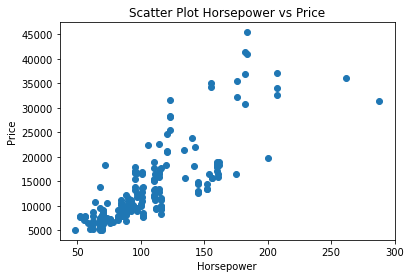

In [10]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

Scatter plot horsewer dan price
* Dari scatter plot dapat dilihat secara kasat mata bahwa data memiliki korelasi
positif yang cukup signifikan.
* Hal ini berarti dengan bertambahnya nilai dari horsepower maka nilai price pun
akan bertambah.

In [ ]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


Nilai korelasi horsepower dan price
6. Setelah kita mengetahui karakteristik dari data kita, maka tahapan selanjutnya adalah Modelling.


1. Pertama, buat variabel (x) dan (y)

In [ ]:
#Pertama, buat variabel x dan y.
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

2. Kedua, kita split data kita menjadi training and testing dengan porsi 80:20.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

3. Ketiga, kita bikin object linear regresi.

In [ ]:
lin_reg = LinearRegression()

4. Keempat, training the model menggunakan training data yang sudah displit sebelumnya.

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

5. Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[165.66766605]]
[-3957.9384597]


Nilai m dan b

* Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 164.73x — 3911.83

6. Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah
displit sebelumnya.

In [ ]:
lin_reg.score(x_test, y_test)

0.6657897090312537

Accuracy score model
* Model kita mendapatkan accuracy score sebesar 78.67%

7. Ketujuh, visualisasi Regression Line menggunakan data testing.

Text(0.5, 1.0, 'Plot Horsepower vs Price')

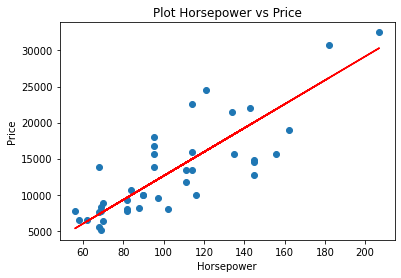

In [ ]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

Regression Line model
* Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

7. Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prediksi dari harga mobil
dengan horsepower 100, 150, dan 200.

In [ ]:
#Prediksi harga mobil dengan horsepower 100.
lin_reg.predict([[100]])

array([[12608.82814487]])

Harga mobil dengan horsepower 100

In [ ]:
#Prediksi harga mobil dengan horsepower 150.
lin_reg.predict([[150]])

array([[20892.21144715]])

Harga mobil dengan horsepower 150

In [ ]:
#Prediksi harga mobil dengan horsepower 200.
lin_reg.predict([[200]])

array([[29175.59474944]])

Harga mobil dengan horsepower 200